In [3]:
#Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create link from Python to DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

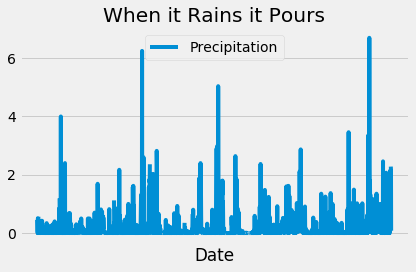

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

precipatation = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

df = pd.DataFrame(precipatation, columns=['Precipitation','Date'])
df.set_index('Date', inplace=True, )
# df.head(10)

df.iloc[::-1].plot.line(title="When it Rains it Pours")
plt.xticks([])
plt.tight_layout()
plt.show()


In [17]:
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Last date in Query: ", last_date)

year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print("One year Ago: ", year_ago)


Last date in Query:  ('2017-08-23',)
One year Ago:  2016-08-23


In [18]:
# Perform a query to retrieve the data and precipitation scores

precipatation = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
print(precipatation)

[(0.08, '2016-08-24'), (2.15, '2016-08-24'), (2.28, '2016-08-24'), (None, '2016-08-24'), (1.22, '2016-08-24'), (2.15, '2016-08-24'), (1.45, '2016-08-24'), (0.08, '2016-08-25'), (0.08, '2016-08-25'), (0.0, '2016-08-25'), (0.0, '2016-08-25'), (0.21, '2016-08-25'), (0.06, '2016-08-25'), (0.11, '2016-08-25'), (0.0, '2016-08-26'), (0.03, '2016-08-26'), (0.02, '2016-08-26'), (0.04, '2016-08-26'), (0.0, '2016-08-26'), (0.01, '2016-08-26'), (0.0, '2016-08-27'), (0.18, '2016-08-27'), (0.02, '2016-08-27'), (0.0, '2016-08-27'), (0.12, '2016-08-27'), (None, '2016-08-27'), (0.01, '2016-08-28'), (0.14, '2016-08-28'), (0.14, '2016-08-28'), (0.14, '2016-08-28'), (0.6, '2016-08-28'), (2.07, '2016-08-28'), (0.0, '2016-08-29'), (0.17, '2016-08-29'), (0.04, '2016-08-29'), (None, '2016-08-29'), (0.0, '2016-08-29'), (0.35, '2016-08-29'), (0.9, '2016-08-29'), (0.0, '2016-08-30'), (0.0, '2016-08-30'), (0.02, '2016-08-30'), (0.0, '2016-08-30'), (0.0, '2016-08-30'), (0.05, '2016-08-30'), (0.13, '2016-08-31'), (

In [23]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

df = pd.DataFrame(precipatation, columns=['precipitation','date'])
df.set_index('date', inplace=True, )
df.head(15)

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


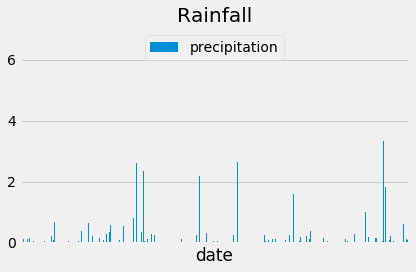

<Figure size 720x576 with 0 Axes>

In [38]:
# Use Pandas Plotting with Matplotlib to plot the data

df.iloc[::-1].plot.bar(title="Rainfall")
plt.xticks([])
plt.tight_layout()
plt.figure(figsize=(10,8))
plt.show()

In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [31]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count()
print(station_count)

9


In [32]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

x = session.query(Measurement.station.label("Station"), 
                                            func.count(Measurement.station).label("Count"))
y = x.group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

for z in y.all():
        print(z)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [33]:
temp = session.query(Measurement.station.label("Station"), 
        func.min(Measurement.tobs).label("Low"),
        func.max(Measurement.tobs).label("High"),
        func.avg(Measurement.tobs).label("Average"))
qry = temp.filter(Measurement.station == ('USC00519281'))
for _res in qry.all():
    print(_res)

('USC00519281', 54.0, 85.0, 71.66378066378067)


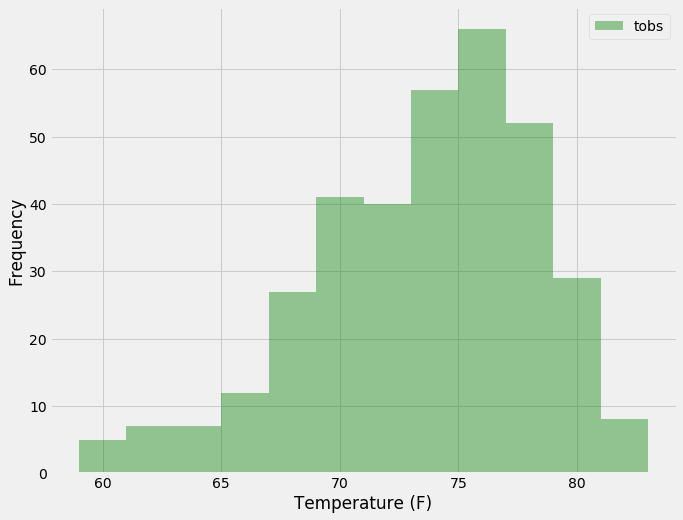

In [37]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import seaborn as sns
# get temps and counts of occurence
temps = session.query(Measurement.tobs).\
    filter(Measurement.date > '2016-08-23').\
    filter(Measurement.station == 'USC00519281').all()

#set the plot size
plt.figure(figsize=(10,8))

#plot the results as a histogram with bins=12
yr_tobs_hist = sns.distplot(temps, bins=12, kde=False, axlabel='Temperature (F)', label='tobs', color='green')

#label the y axis
yr_tobs_hist.set(ylabel='Frequency')

plt.legend()
plt.show()